#  LSTM  model Time Series Forecasting- Deep Learning(Forex EURUSD M15)
if you are interested in LSTM model timeseries you will see examples in most cases, timeseries predicting the stock price, where the price moves up in one direction making small pullbacks. How good is the LSTM model at predicting a currency EURUSR at M15 timeframe pair that is constantly changing direction?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Candlestick overview
Candlestick shows the  open, high, low, and close price for the 15 minute timeframe. The candlestick has a wide part, which is called the "real body." 
This real body represents the price range between the open and close of that m15 candlestick trading. For example, a down candle is often shaded red , and up candles are often shaded green.

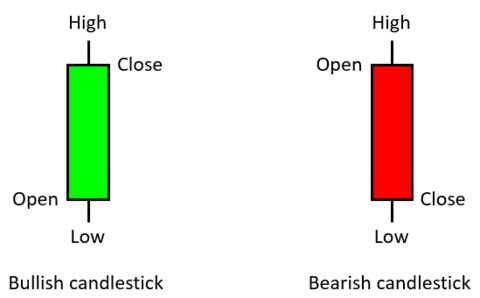

In [2]:
from IPython.display import Image
Image(filename='../input/eurusd-m15/candlestick.png', ) 

![](http://)

# Data
dataset is  200,000 candles  15 minute timeframe

In [3]:
df = pd.read_csv('../input/eurusd-m15/EURUSD_M15.csv', names = ['time','open','high','low','close','volume'], index_col= 'time')
df

,open,high,low,close,volume
time,,,,,
2013-03-18 05:30,1.29059,1.29090,1.29058,1.29088,672
2013-03-18 05:45,1.29088,1.29117,1.29077,1.29110,1139
2013-03-18 06:00,1.29110,1.29110,1.29023,1.29027,1233
2013-03-18 06:15,1.29025,1.29086,1.29022,1.29050,1039
2013-03-18 06:30,1.29049,1.29054,1.28924,1.28924,1550
...,...,...,...,...,...
2021-03-26 21:45,1.17956,1.17991,1.17938,1.17976,921
2021-03-26 22:00,1.17977,1.17999,1.17971,1.17978,495
2021-03-26 22:15,1.17978,1.17980,1.17931,1.17941,356


* Only need the high and low price of the candlestick

In [4]:
df = df.drop(['volume','open','close'], axis = 1)
df

,high,low
time,,
2013-03-18 05:30,1.29090,1.29058
2013-03-18 05:45,1.29117,1.29077
2013-03-18 06:00,1.29110,1.29023
2013-03-18 06:15,1.29086,1.29022
2013-03-18 06:30,1.29054,1.28924
...,...,...
2021-03-26 21:45,1.17991,1.17938
2021-03-26 22:00,1.17999,1.17971
2021-03-26 22:15,1.17980,1.17931


Split data for train and test. From 2013-03-18 to end 2020 will be train data, what's left test data

In [5]:
train = df.loc['2013-03-18':'2021-01']
train = train.values
test = df.loc['2021-01':'2021-04']
test = test.values

Function for data creation. Look back 96 candlestick(24 hours) for prediction one m15 candlestick

In [6]:
def create_data(df, look_back = 96):
    X = []
    y = []
    for i in range(look_back, len(df)):
        X.append(df[i-look_back:i,:])
        y.append(df[i,:])
    X , y = np.array(X), np.array(y)
    return X , y

Create train and test data, use function create_data

In [7]:
X_train, y_train = create_data(train)
X_test, y_true = create_data(test)

In [8]:
"""
model = tf.keras.Sequential()
model.add(LSTM(256, return_sequences= True, input_shape =(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences= False))
model.add(Dense(2)) 

model.compile( optimizer = 'adam', loss= 'mean_squared_error')
"""

"\nmodel = tf.keras.Sequential()\nmodel.add(LSTM(256, return_sequences= True, input_shape =(X_train.shape[1], X_train.shape[2])))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(128, return_sequences= False))\nmodel.add(Dense(2)) \n\nmodel.compile( optimizer = 'adam', loss= 'mean_squared_error')\n"

In [9]:
"""
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = model.fit(X_train, y_train, batch_size = 128, epochs = 1000, verbose = 1, callbacks=[callback])
"""

"\ncallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)\nhistory = model.fit(X_train, y_train, batch_size = 128, epochs = 1000, verbose = 1, callbacks=[callback])\n"

In [10]:
from tensorflow.keras.models import load_model
model = load_model('../input/eurusd-m15/EURUSD_M15.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 96, 256)           265216    
_________________________________________________________________
dropout (Dropout)            (None, 96, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 462,594
Trainable params: 462,594
Non-trainable params: 0
_________________________________________________________________


Made predictions for test data

In [11]:
y_pred = model.predict(X_test)
y_pred

array([[1.2243906, 1.2236707],
       [1.224161 , 1.2234399],
       [1.2242948, 1.2235832],
       ...,
       [1.1793727, 1.1786821],
       [1.1789876, 1.1782966],
       [1.1788062, 1.1781223]], dtype=float32)

# Metric for evaluating the model
R^2 (coefficient of determination) regression score function.
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
r2

0.9937541317281683

In [13]:
y_pred = pd.DataFrame(y_pred, columns = ['high', 'low'])
y_true = pd.DataFrame(y_true, columns =['high', 'low'])

In [14]:
y_pred

,high,low
0,1.224391,1.223671
1,1.224161,1.223440
2,1.224295,1.223583
3,1.224455,1.223740
4,1.224428,1.223715
...,...,...
5659,1.179026,1.178325
5660,1.179179,1.178486
5661,1.179373,1.178682
5662,1.178988,1.178297


# Result visualization

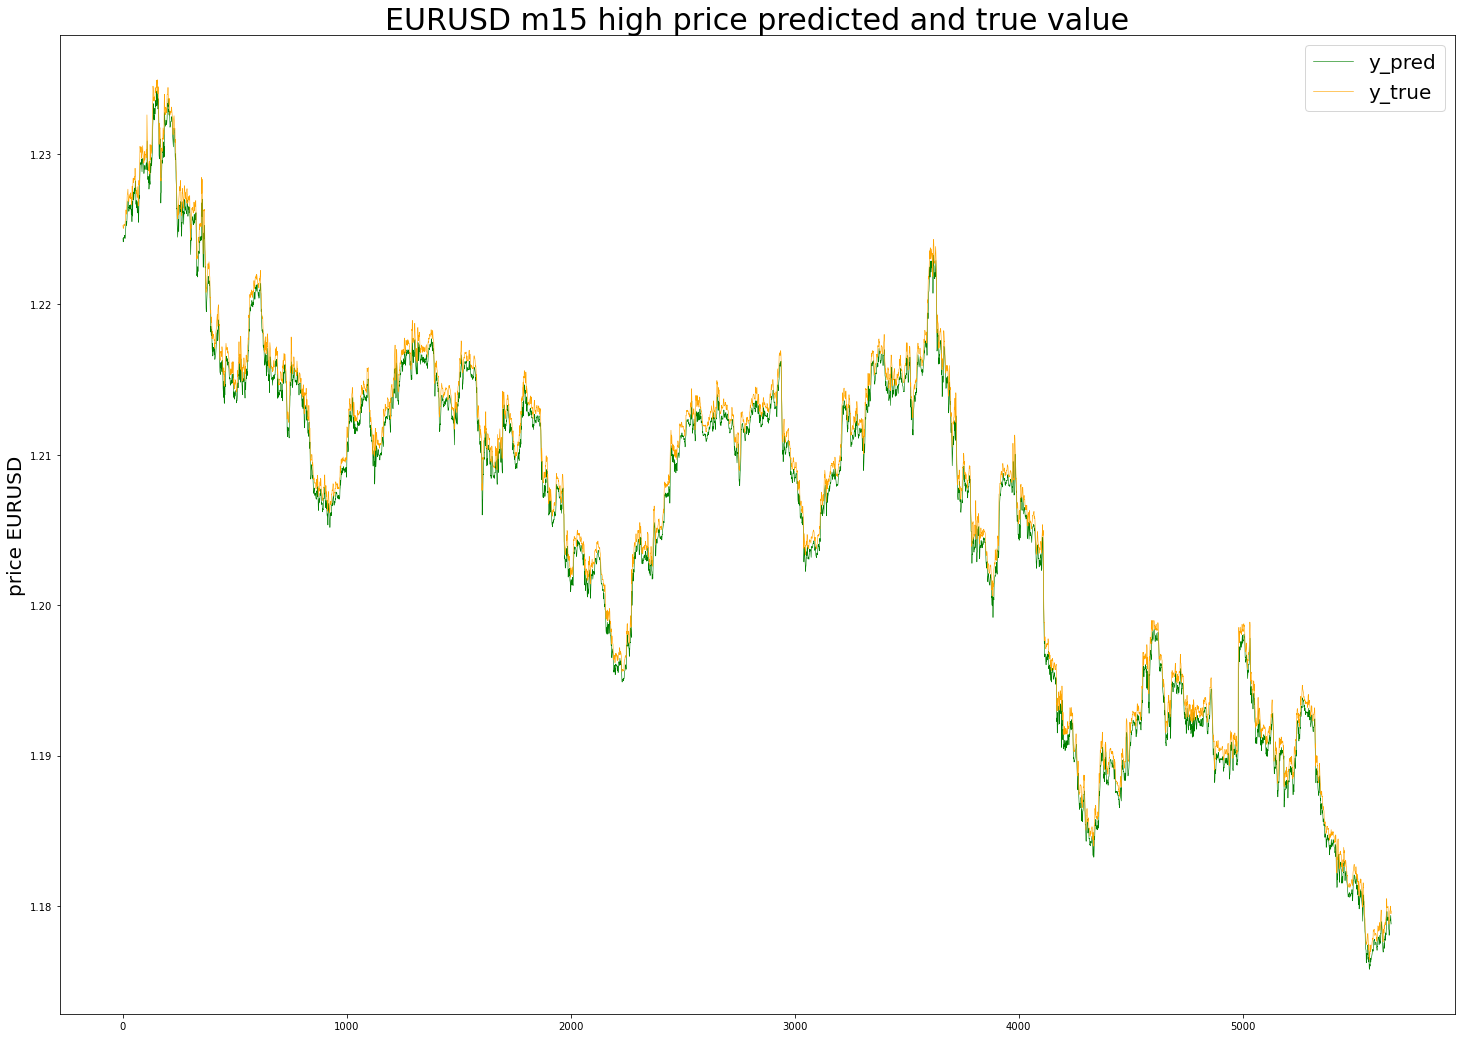

In [15]:
plt.figure(figsize=(25, 18))
plt.title("EURUSD m15 high price predicted and true value",fontsize = 30)
plt.ylabel("price EURUSD", fontsize = 20)
plt.plot(y_pred['high'], color = "green", linewidth=0.6)
plt.plot(y_true['high'], color = "orange", linewidth=0.6)
plt.legend(['y_pred','y_true'], fontsize = 20)
plt.show()

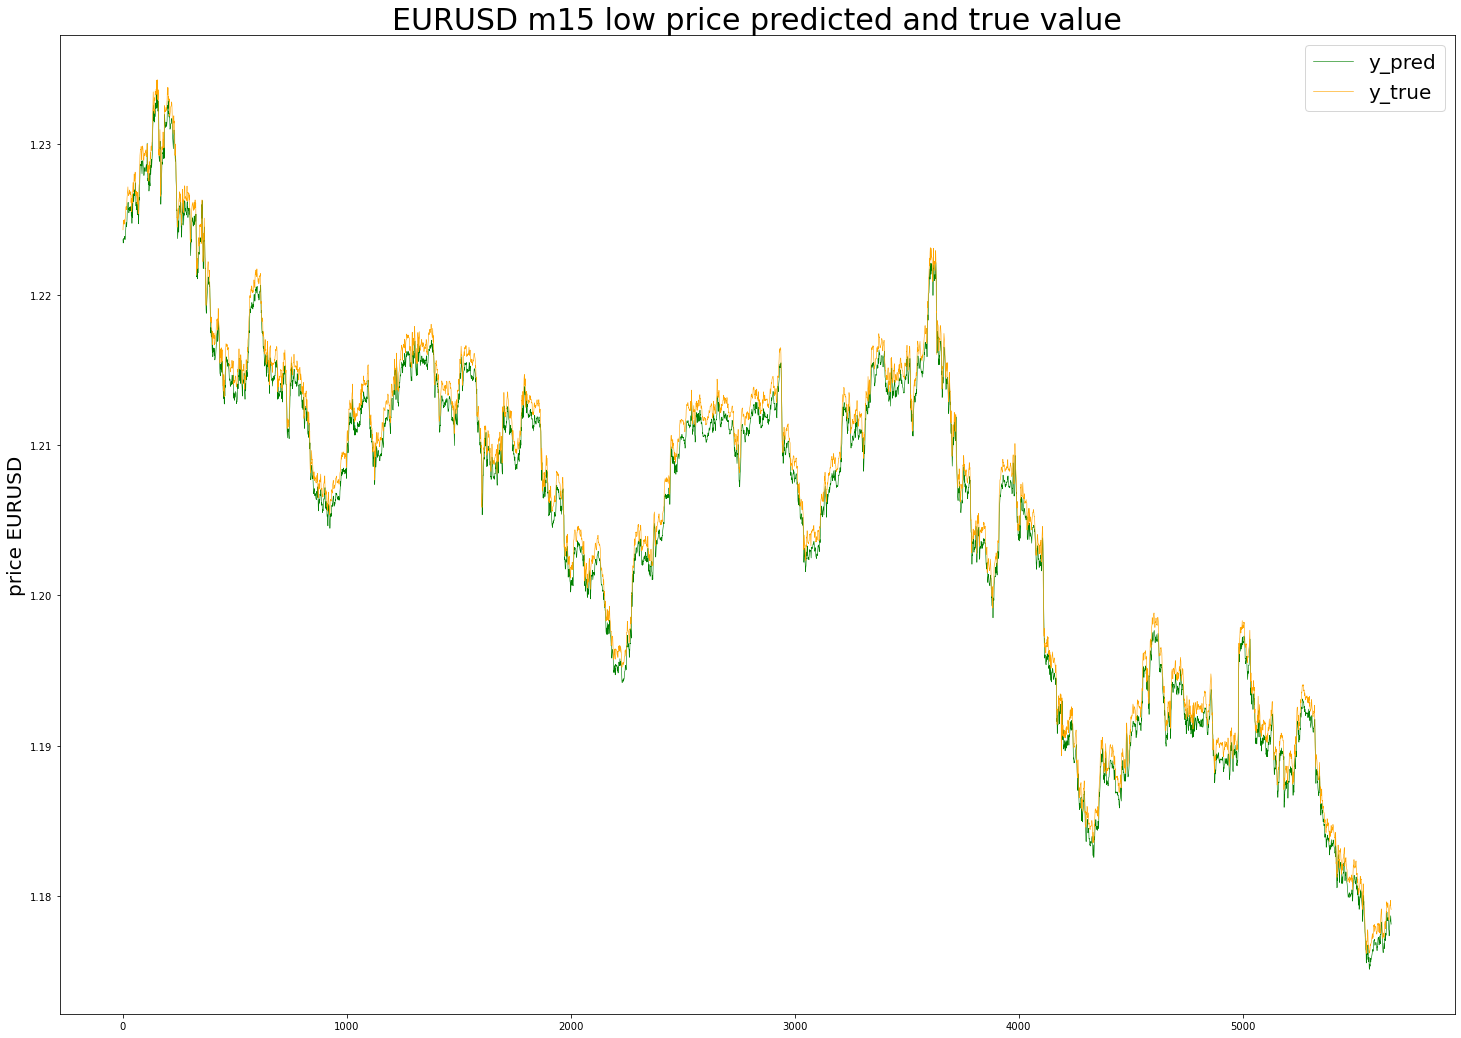

In [16]:
plt.figure(figsize=(25, 18))
plt.title("EURUSD m15 low price predicted and true value",fontsize = 30)
plt.ylabel("price EURUSD", fontsize = 20)
plt.plot(y_pred['low'], color = "green", linewidth=0.6)
plt.plot(y_true['low'], color = "orange", linewidth=0.6)
plt.legend(['y_pred','y_true'], fontsize = 20)
plt.show()

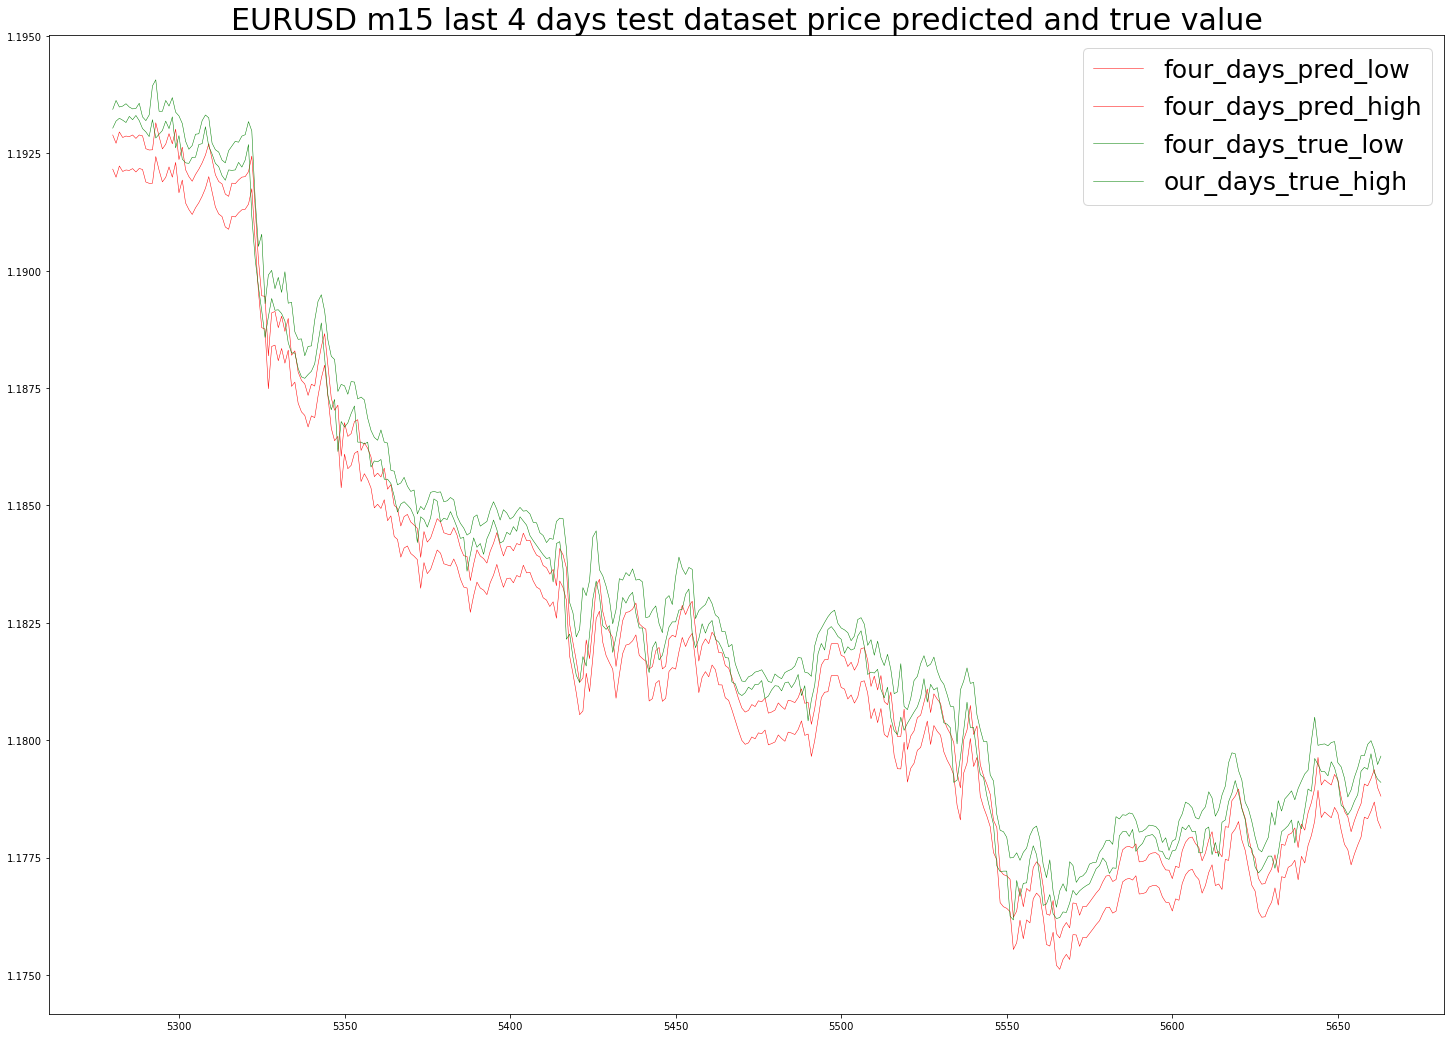

In [17]:
four_days_pred = y_pred.tail(384)
four_days_true = y_true.tail(384)
plt.figure(figsize=(25, 18))
plt.title("EURUSD m15 last 4 days test dataset price predicted and true value",fontsize = 30)
plt.plot(four_days_pred['low'], linewidth=0.5, color ='red')
plt.plot(four_days_pred['high'], linewidth=0.5, color ='red')
plt.plot(four_days_true['low'], linewidth=0.5, color ='green')
plt.plot(four_days_true['high'], linewidth=0.5, color ='green')
plt.legend(['four_days_pred_low','four_days_pred_high','four_days_true_low','our_days_true_high'], fontsize = 25)
plt.show()
